In [ ]:
# Flask project link 
# I have added user interface to this project using flask which can be accessed using following link 
# https://drive.google.com/drive/u/3/folders/1WUkobjCQ2sNF6uoCVeUuvq82uBfv3Xv-
# To deploy this fast project I have mentioned all depedencies in requirement.txt 

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

The PIL library is used to open image content into an array.

In [2]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'dataset/Train',str(i)) # training dataset path will goes here
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(os.path.join(path, a))
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print("Error loading image")
        # break


#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

In [3]:
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)


(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


Building the model/Compile the model

In [4]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

2023-08-04 11:46:39.643212: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-04 11:46:39.644110: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [5]:

epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/15
981/981 [==============================] - 18s 18ms/step - loss: 2.0632 - accuracy: 0.4649 - val_loss: 0.6905 - val_accuracy: 0.8152
Epoch 2/15
981/981 [==============================] - 17s 18ms/step - loss: 0.8397 - accuracy: 0.7522 - val_loss: 0.2821 - val_accuracy: 0.9287
Epoch 3/15
981/981 [==============================] - 17s 18ms/step - loss: 0.5317 - accuracy: 0.8465 - val_loss: 0.2062 - val_accuracy: 0.9396
Epoch 4/15
981/981 [==============================] - 17s 17ms/step - loss: 0.4353 - accuracy: 0.8756 - val_loss: 0.1354 - val_accuracy: 0.9631
Epoch 5/15
981/981 [==============================] - 17s 17ms/step - loss: 0.3564 - accuracy: 0.8985 - val_loss: 0.1075 - val_accuracy: 0.9685
Epoch 6/15
981/981 [==============================] - 17s 18ms/step - loss: 0.3204 - accuracy: 0.9082 - val_loss: 0.0863 - val_accuracy: 0.9778
Epoch 7/15
981/981 [==============================] - 17s 17ms/step - loss: 0.2882 - accuracy: 0.9173 - val_loss: 0.1298 - val_accuracy:

../local/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


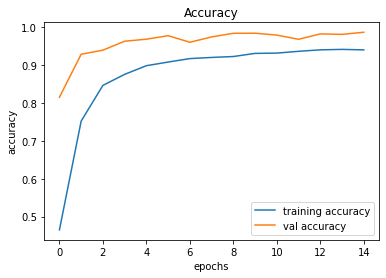

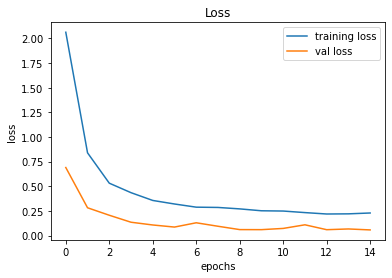

In [6]:

#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [7]:
history.history['val_loss']

[0.6904531121253967,
 0.2821439504623413,
 0.20624355971813202,
 0.13540908694267273,
 0.1074937954545021,
 0.08629702031612396,
 0.1297958493232727,
 0.09452874213457108,
 0.06058863177895546,
 0.06006166338920593,
 0.07253815978765488,
 0.10928323119878769,
 0.0596921481192112,
 0.06711923331022263,
 0.057388775050640106]

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 11, 11, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [9]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('dataset/Test.csv') # Testing dataset's csv file path will goes here
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
    img = f"dataset/Test/{img}" # Testing dataset path will goes here
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    
X_test=np.array(data)
# pred = model.predict_classes(X_test)
pred = model.predict(X_test)
pred = np.argmax(pred, axis=-1)
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

model.save('traffic_classifier.h5')

395/395 [==============================] - 2s 4ms/step
0.9517814726840855


../local/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [30]:
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }

In [34]:
from keras.models import load_model
model = load_model("traffic_classifier.h5")
file_path = r"D:\Users\ankus\Desktop\traffic_project\app\static\dataset\Test\00034.png"
image = Image.open(file_path)
image = image.resize((30, 30))
image = np.expand_dims(image, axis=0)
image = np.array(image)
pred = model.predict(image[:, :, :, :3])[0]
#Accuracy with the test data

1/1 [==============================] - 1s 521ms/step


In [35]:
# sign = classes[pred]
# print(sign)
classes[np.argmax(pred, axis=-1) + 1]

'Speed limit (50km/h)'